<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> Logistic Regression in R</font></h1>

<a id="ref1"></a>
## What is different between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it isn’t the best tool for predicting the class of an observed data point. In order to estimate a classification, we need some sort of guidance on what would be the **most probable class** for that data point. For this, we use **Logistic Regression**.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
Linear regression finds a function that relates a continuous dependent variable, _y_, to some predictors (independent variables _x1_, _x2_, etc.). Simple linear regression assumes a function of the form:
<br><br>
$$
y = w0 + w1 * x1 + w2 * x2 +...
$$
<br>
and finds the values of _w0_, _w1_, _w2_, etc. The term _w0_ is the "intercept" or "constant term" (it's shown as _b_ in the formula below):
<br><br>
$$
Y = WX + b
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, _y_, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Despite the name logistic _regression_, it is actually a __probabilistic classification__ model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

$$
ProbabilityOfaClass = \theta(y) = \frac{e^y}{1+e^y} = exp(y) / (1+exp(y)) = p 
$$

which produces p-values between 0 (as y approaches minus infinity) and 1 (as y approaches plus infinity). This now becomes a special kind of non-linear regression.

In this equation, _y_ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\theta(y)$ is the [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modelling population growth.

You might also have seen this function before, in another configuration:

$$
ProbabilityOfaClass = \theta(y) = \frac{1}{1+e^{-x}}
$$

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png", width = "400", align = "center">



Lets first install requiered libraries

In [2]:
install.packages("dummies")
install.packages('class')
install.packages('VGAM')
print("Done") #Takes about 30 seconds
install.packages('gridExtra')


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dennis\AppData\Local\Temp\RtmpM1Oc7Z\downloaded_packages


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'class' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'class'"


The downloaded binary packages are in
	C:\Users\Dennis\AppData\Local\Temp\RtmpM1Oc7Z\downloaded_packages


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'VGAM' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dennis\AppData\Local\Temp\RtmpM1Oc7Z\downloaded_packages
[1] "Done"


Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dennis\AppData\Local\Temp\RtmpM1Oc7Z\downloaded_packages


### Libraries  for Plotting 

In [3]:
library(ggplot2)
library(gridExtra)
options(jupyter.plot_mimetypes = 'image/png')

print("Done")

[1] "Done"


### About dataset

### The following is a list of what each column of the data frame represents  



Loan_status: Whether a loan is paid off on in collection

Principal: Basic principal loan amount at the 

Originationterms Can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date: When the loan got originated and took effects

Due_date: Since it’s one-time payoff schedule, each loan has one single due date


age:age 
education: education 
gender:

### Lets Download data

In [6]:
#Click here and press Shift+Enter
#download.file("Meetup04052017Rnotebook.csv",
              destfile = "LoanData.csv", quiet = TRUE)
#options(scipen = 999) #disable scientific notation

ERROR: Error in parse(text = x, srcfile = src): <text>:3:40: unexpected ','
2: #download.file("Meetup04052017Rnotebook.csv",
3:               destfile = "LoanData.csv",
                                          ^


### Load Data From CSV File  

In [7]:
LoanData <- read.csv("LoanData.csv")
head(LoanData)

X,Unnamed..0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4


#### How many rows, columns in total?

In [8]:
nrow(LoanData)

[1] 400

In [9]:
ncol(LoanData)

[1] 11

# Data Visualization and Analysis 



#### Let’s see how many of each class is in our data set 

In [10]:
#df['loan_status'].value_counts()
base::table(LoanData['loan_status'])


COLLECTION    PAIDOFF 
       100        300 

#### 300 people have paid off the loan on time and 100 have gone into collection 


### Lets Plot a Histogram of the data

For different __Principal:__

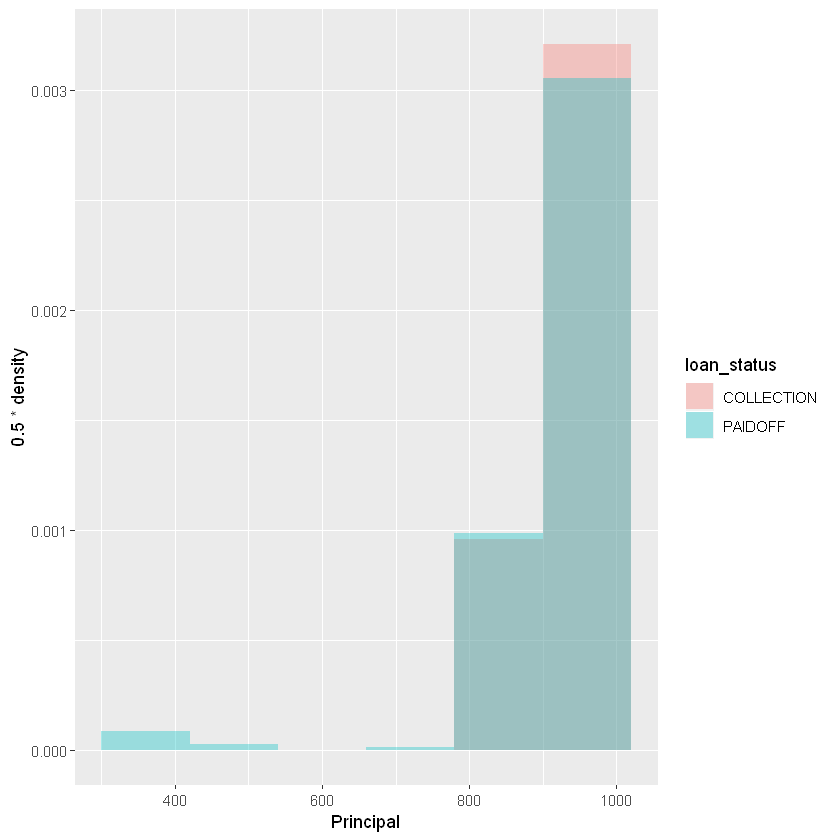

In [11]:
ggplot(LoanData, aes(x=Principal, fill=loan_status)) +geom_histogram(binwidth=120,alpha=0.35,aes(y=0.5*..density..),position='identity')

For different __terms:__

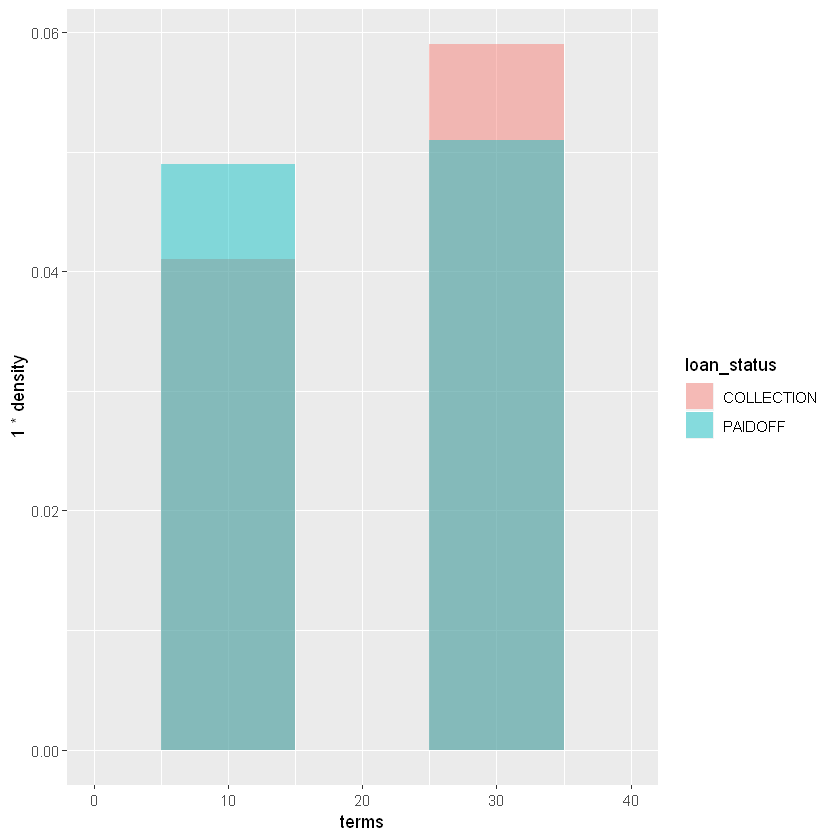

In [12]:
ggplot(LoanData, aes(x=terms, fill=loan_status)) +geom_histogram(binwidth=10,alpha=0.45,aes(y=1*..density..),position='identity')+scale_x_continuous(limits = c(0, 40))

And, for different ages:

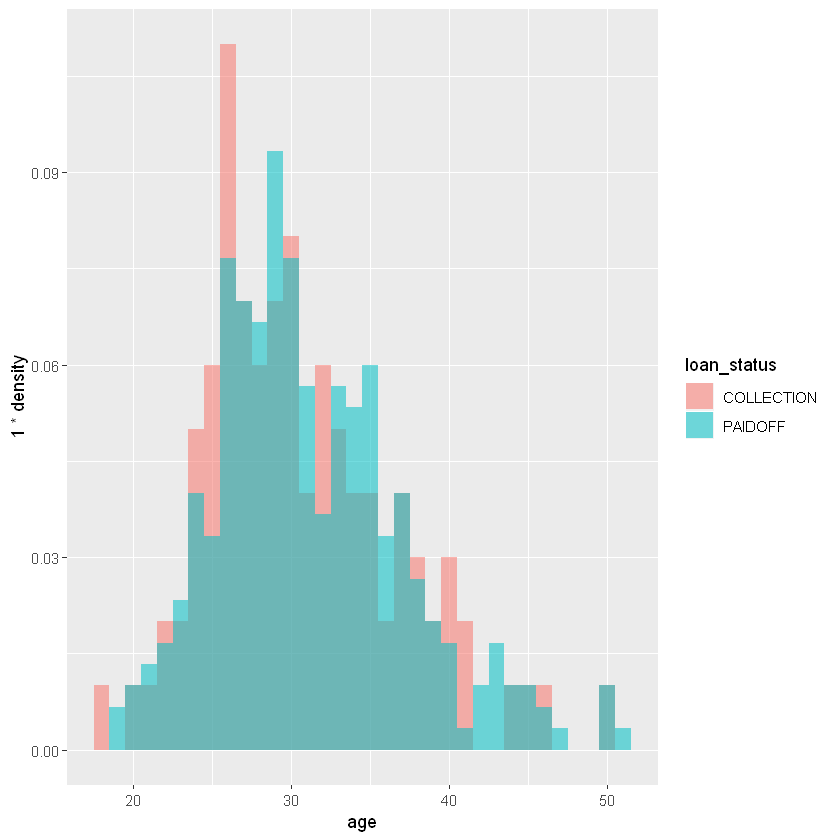

In [13]:
ggplot(LoanData, aes(x=age, fill=loan_status)) +geom_histogram(binwidth=1,alpha=0.55,aes(y=1*..density..),position='identity')

## Let’s Examine the Variables in Two Dimensions   

Warning message:
"Removed 12 rows containing non-finite values (stat_bin)."

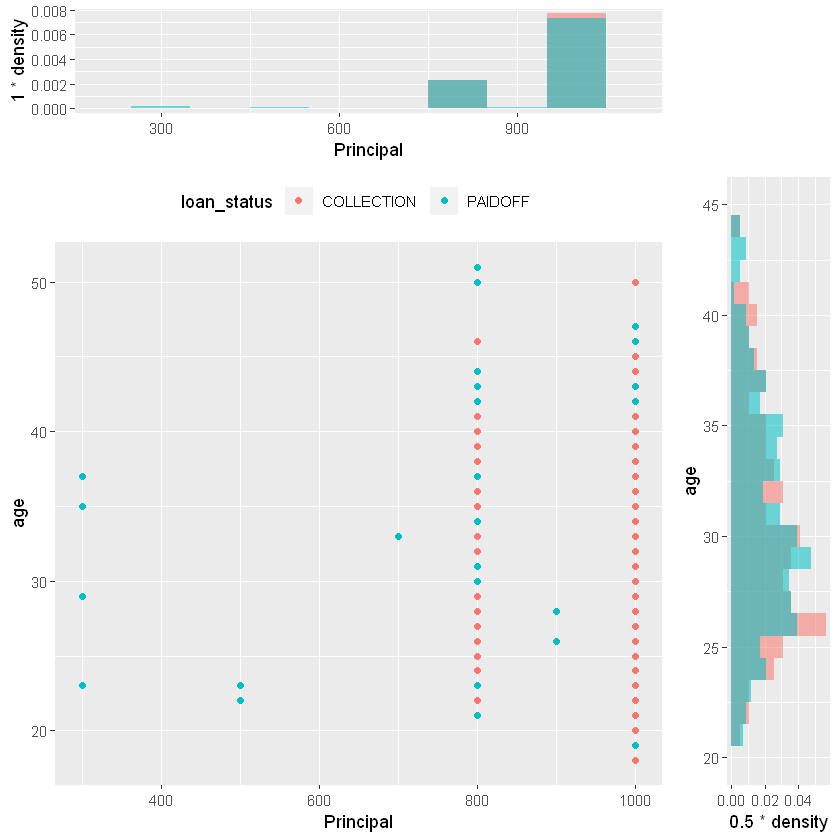

In [14]:
hist_top <-ggplot(LoanData, aes(x=Principal, fill=loan_status)) +geom_histogram(binwidth=100,alpha=0.55,aes(y=1*..density..),position='identity')+ theme(legend.position="none")+scale_x_continuous(limits = c(200, 1100))
empty <- ggplot()+geom_point(aes(1,1), colour="white")+
         theme(axis.ticks=element_blank(), 
               panel.background=element_blank(), 
               axis.text.x=element_blank(), axis.text.y=element_blank(),           
               axis.title.x=element_blank(), axis.title.y=element_blank())

#qplot(Principal, age, data = LoanData, colour = loan_status)
scatter <-ggplot(LoanData, aes(Principal, age),fill= loan_status)  + geom_point(aes(colour = loan_status))+ theme(legend.position="top")
hist_right <-ggplot(LoanData, aes(x=age, fill=loan_status))+scale_x_continuous(limits = c(20, 45)) +geom_histogram(binwidth=1,alpha=0.55,aes(y=0.5*..density..),position='identity')+coord_flip()+ theme(legend.position="none")


grid.arrange(hist_top, empty, scatter, hist_right, ncol=2, nrow=2, widths=c(4, 1), heights=c(1, 4))

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

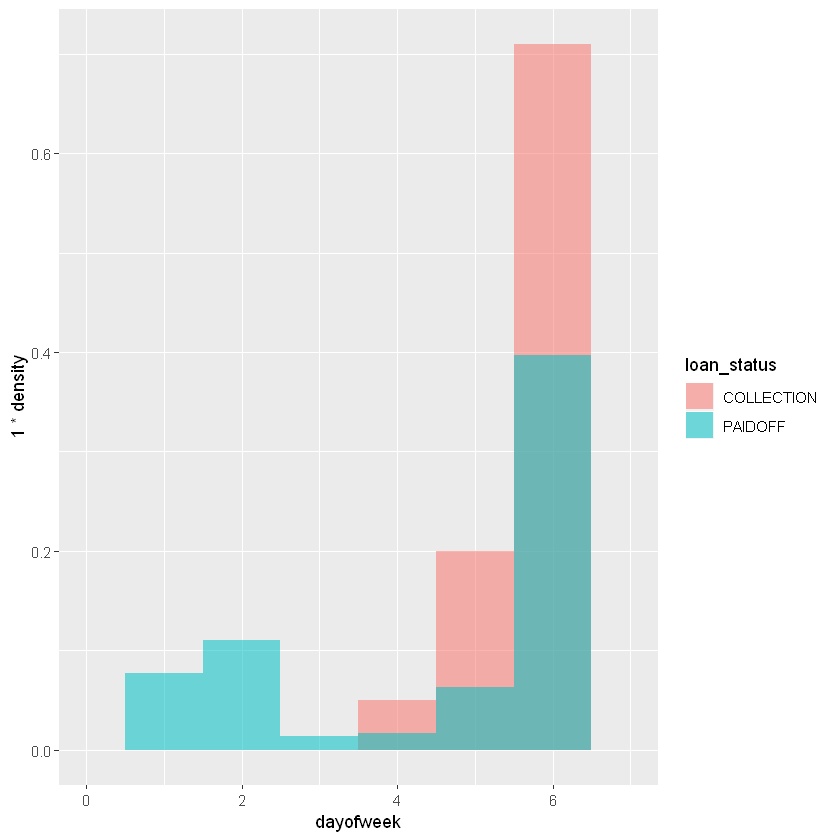

In [15]:
ggplot(LoanData, aes(x=dayofweek, fill=loan_status))  +geom_histogram(binwidth=1,alpha=0.55,aes(y=1*..density..),position='identity')+scale_x_continuous(limits = c(0, 7))

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

#### Converting days of the week to categorical value

Create empty vector for indicator variable, Then, Set all values over the 3 day equal to one,  else keep them at zero. 

In [16]:
namevector <- c("Weekend")
LoanData[,namevector] <- 0
LoanData$Weekend[LoanData$dayofweek>3]<-1
head(LoanData)

X,Unnamed..0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,Weekend
0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1


### Encoding one categorical  feature 
We have to encode the `gender` column as well.

In [17]:
namevector <- c("Gender01")
LoanData[,namevector] <- 0
LoanData$Gender01[LoanData$Gender=='male']=1
head(LoanData[,c('Gender','Gender01')])

Gender,Gender01
male,1
female,0
female,0
male,1
female,0
male,1


In [18]:
base::table(LoanData$Gender01, LoanData$loan_status)

   
    COLLECTION PAIDOFF
  0         10      53
  1         90     247

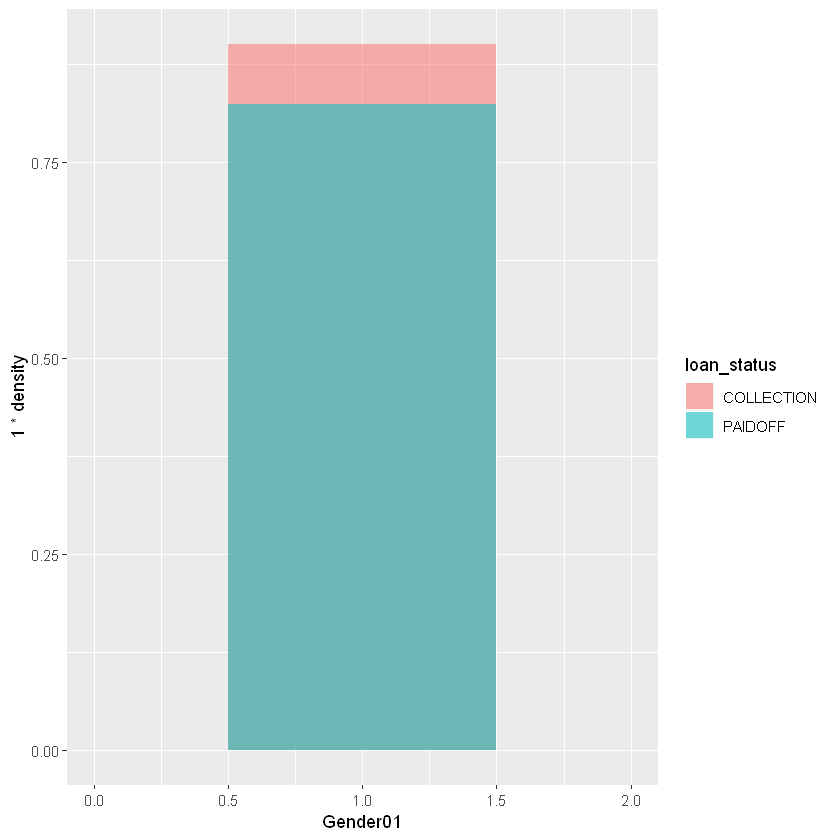

In [19]:
ggplot(LoanData, aes(x=Gender01, fill=loan_status))  +geom_histogram(binwidth=1,alpha=0.55,aes(y=1*..density..),position='identity')+scale_x_continuous(limits = c(0, 2))

As we can see, 84 % of female pay there loans while ony 73 % of males  pay there loan

### Convert  Multiple Categorical Features  Using One Hot Encoding 

Some variables, such as `Education`, have multiple value, and we have to use __ one-hot encoding__ technique to discretize them, therefore, we use `dummies` library.

In [20]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns



Feature befor One Hot Encoding:

In [21]:
head(LoanData['education'])

education
High School or Below
Bechalor
Bechalor
college
college
Master or Above


Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [22]:
LoanData=dummy.data.frame(LoanData, names=c("education"))
head(LoanData[c('educationBechalor', 'educationcollege',  'educationHigh School or Below','educationMaster or Above')])

educationBechalor,educationcollege,educationHigh School or Below,educationMaster or Above
0,0,1,0
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
0,0,0,1


### Assembling the features

Let’s put all the features in a Data Frame 

In [23]:
Colunms <- c('Principal','terms','age','educationBechalor', 'educationcollege',  'educationHigh School or Below','educationMaster or Above','Weekend','Gender01')
Data <- LoanData[Colunms]
head(Data)

Principal,terms,age,educationBechalor,educationcollege,educationHigh School or Below,educationMaster or Above,Weekend,Gender01
1000,30,45,0,0,1,0,0,1
1000,30,50,1,0,0,0,0,0
1000,30,33,1,0,0,0,0,0
1000,15,27,0,1,0,0,0,1
1000,30,28,0,1,0,0,1,0
300,7,35,0,0,0,1,1,1


Lets put all the labels in the data frame y

In [24]:
NewColumn <- c("Class")
Data[,NewColumn] <- 0
Data$Class[LoanData$loan_status=='PAIDOFF']=1
head(Data[,NewColumn],10)
head(LoanData$loan_status,10)

[1] 1 1 1 1 1 1 1 1 1 1

[1] PAIDOFF PAIDOFF PAIDOFF PAIDOFF PAIDOFF PAIDOFF PAIDOFF PAIDOFF PAIDOFF
[10] PAIDOFF
Levels: COLLECTION PAIDOFF

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [25]:
Data[Colunms] <- scale(Data[Colunms])
head(Data[Colunms])

Principal,terms,age,educationBechalor,educationcollege,educationHigh School or Below,educationMaster or Above,Weekend,Gender01
0.5006747,0.9197424,2.3104561,-0.3860722,-0.8674676,1.1498989,-0.1003781,-1.2168652,0.431829
0.5006747,0.9197424,3.1391707,2.5837138,-0.8674676,-0.8674676,-0.1003781,-1.2168652,-2.309942
0.5006747,0.9197424,0.3215412,2.5837138,-0.8674676,-0.8674676,-0.1003781,-1.2168652,-2.309942
0.5006747,-0.9320879,-0.6729162,-0.3860722,1.1498989,-0.8674676,-0.1003781,-1.2168652,0.431829
0.5006747,0.9197424,-0.5071733,-0.3860722,1.1498989,-0.8674676,-0.1003781,0.8197293,-2.309942
-5.3162931,-1.9197307,0.6530271,-0.3860722,-0.8674676,-0.8674676,9.9374292,0.8197293,0.431829


## Train Test Split  
Lets split our data into train and test set.

In [26]:
set.seed(3)
testindex <- sample.int(nrow(Data))[1:floor(0.1*nrow(Data))]
TestData <- Data[testindex,];
head(TestData)
TrainData=Data[-testindex,]
head(TrainData)

,Principal,terms,age,educationBechalor,educationcollege,educationHigh School or Below,educationMaster or Above,Weekend,Gender01,Class
68,0.5006747,0.9197424,0.9845129,-0.3860722,-0.8674676,1.1498989,-0.1003781,0.8197293,0.431829,1
323,0.5006747,0.9197424,0.9845129,-0.3860722,1.1498989,-0.8674676,-0.1003781,0.8197293,0.431829,0
154,0.5006747,-0.9320879,-0.1756875,-0.3860722,1.1498989,-0.8674676,-0.1003781,-1.2168652,0.431829,1
131,0.5006747,-0.9320879,-0.8386591,-0.3860722,-0.8674676,1.1498989,-0.1003781,0.8197293,0.431829,1
239,0.5006747,-0.9320879,-0.3414304,-0.3860722,1.1498989,-0.8674676,-0.1003781,-1.2168652,0.431829,1
396,0.5006747,0.9197424,-1.0044020,-0.3860722,-0.8674676,1.1498989,-0.1003781,0.8197293,0.431829,0


,Principal,terms,age,educationBechalor,educationcollege,educationHigh School or Below,educationMaster or Above,Weekend,Gender01,Class
1,0.5006747,0.9197424,2.3104561,-0.3860722,-0.8674676,1.1498989,-0.1003781,-1.2168652,0.431829,1
2,0.5006747,0.9197424,3.1391707,2.5837138,-0.8674676,-0.8674676,-0.1003781,-1.2168652,-2.309942,1
3,0.5006747,0.9197424,0.3215412,2.5837138,-0.8674676,-0.8674676,-0.1003781,-1.2168652,-2.309942,1
4,0.5006747,-0.9320879,-0.6729162,-0.3860722,1.1498989,-0.8674676,-0.1003781,-1.2168652,0.431829,1
5,0.5006747,0.9197424,-0.5071733,-0.3860722,1.1498989,-0.8674676,-0.1003781,0.8197293,-2.309942,1
7,0.5006747,0.9197424,-0.3414304,-0.3860722,1.1498989,-0.8674676,-0.1003781,0.8197293,0.431829,1


## Logistic regression

We now define our operations in order to properly run the Logistic Regression. Logistic regression is typically thought of as a single equation:

$$
ŷ =sigmoid(WX+b)
$$

However, for the sake of clarity, we can have it broken into its three main components: 
- a weight times features matrix multiplication operation, 
- a summation of the weighted features and a bias term, 
- and finally the application of a sigmoid function. 

As such, you will find these components defined as three separate operations below.



In [27]:
model <- glm(Class~.,family=binomial(link='logit'),data=TrainData, control = list(maxit = 50))
summary(model)


Call:
glm(formula = Class ~ ., family = binomial(link = "logit"), data = TrainData, 
    control = list(maxit = 50))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8869  -1.0086   0.2397   0.9093   1.3874  

Coefficients: (1 not defined because of singularities)
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       1.817044   8.791471   0.207    0.836    
Principal                        -0.002635   0.192017  -0.014    0.989    
terms                            -0.181165   0.168686  -1.074    0.283    
age                               0.141015   0.144236   0.978    0.328    
educationBechalor                -4.621262 295.935701  -0.016    0.988    
educationcollege                 -6.803958 435.649967  -0.016    0.988    
`educationHigh School or Below`  -7.081641 435.649967  -0.016    0.987    
`educationMaster or Above`              NA         NA      NA       NA    
Weekend                          -1.6

## Prediction
Now we can predict using our test set:

In [28]:
fitted.results <- predict(model,newdata=TestData,type='response')
yhat <- ifelse(fitted.results > 0.5,1,0)
yhat[1:5]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

68 323 154 131 239 
  0   1   1   0   1

Lets get the actual labels 

In [29]:
y <- TestData[,c('Class')]
y[1:4]

[1] 1 0 1 1

## Evaluation
Lets calculate the accuracy 

In [30]:
mean(yhat==y)

[1] 0.7

We can build Confusion matrix ('PAIDOFF=1,COLLECTION=0) as well

In [31]:
ConfutationMatrix<- base::table(paste(as.character(yhat)," pred", sep =""), paste(as.character(y)," true", sep =""))
ConfutationMatrix

        
         0 true 1 true
  0 pred      2      7
  1 pred      5     26

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0151EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0151EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0151EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, <a href = "https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> 

<hr>
Copyright &copy; 2016 [Cognitive Class](https://cognitiveClass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).